### Sales Analysis

##### Import important libraries  

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Merge data from each month into one CSV

In [2]:
path="./Sales_Data"
files=[file for file in os.listdir(path) if not file.startswith('.')]

all_data=pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_data=pd.concat([all_data, current_data])

all_data.to_csv("all_data_file.csv", index=False)

#### imports a CSV file to DataFrame format

In [3]:
dataset=pd.read_csv("all_data_file.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### returns the number of missing values in the dataset

In [5]:
dataset.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### removes the rows that contains NULL values

In [6]:
dataset.dropna(axis=0, how='all', inplace=True)

In [7]:
dataset.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Clean data by removing rows with invalid 'Order Date' 

In [8]:
dataset=dataset[dataset['Order Date'].str[0:2]!='Or']

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### convert the given argument to a numeric type

In [10]:
dataset['Quantity Ordered']=pd.to_numeric(dataset['Quantity Ordered'],downcast='integer' )
dataset['Price Each']=pd.to_numeric(dataset['Price Each'],downcast='float' )

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int8   
 3   Price Each        185950 non-null  float32
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float32(1), int8(1), object(4)
memory usage: 8.0+ MB


#### Add month column

In [12]:
dataset['Month'] = dataset['Order Date'].str[0:2]
dataset['Month']=dataset['Month'].astype('int')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [13]:
dataset['Sales']=dataset['Quantity Ordered'] * dataset['Price Each']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


#### Add city and Pincode column

In [14]:
dataset['City']=dataset['Purchase Address'].str.split(',').str[1]
dataset['Pincode'] = dataset['Purchase Address'].str.split(',').str[2]
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Pincode
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,MA 02215
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA 90001


## Data Exploration

##### What was the best month for sales? How much was earned that month?

In [15]:
y=dataset.groupby('Month').sum(['Sales'])
print(y)

       Quantity Ordered   Price Each       Sales
Month                                           
1                 10903  1811768.375  1822256.75
2                 13449  2188884.750  2202022.50
3                 17005  2791207.750  2807100.25
4                 20558  3367671.000  3390670.25
5                 18667  3135125.000  3152606.75
6                 15253  2562025.500  2577802.25
7                 16072  2632539.500  2647775.75
8                 13448  2230345.500  2244467.75
9                 13109  2084992.125  2097560.00
10                22703  3715554.750  3736726.75
11                19798  3180600.750  3199603.25
12                28114  4588415.500  4613443.50


Text(0.5, 0, 'Month number')

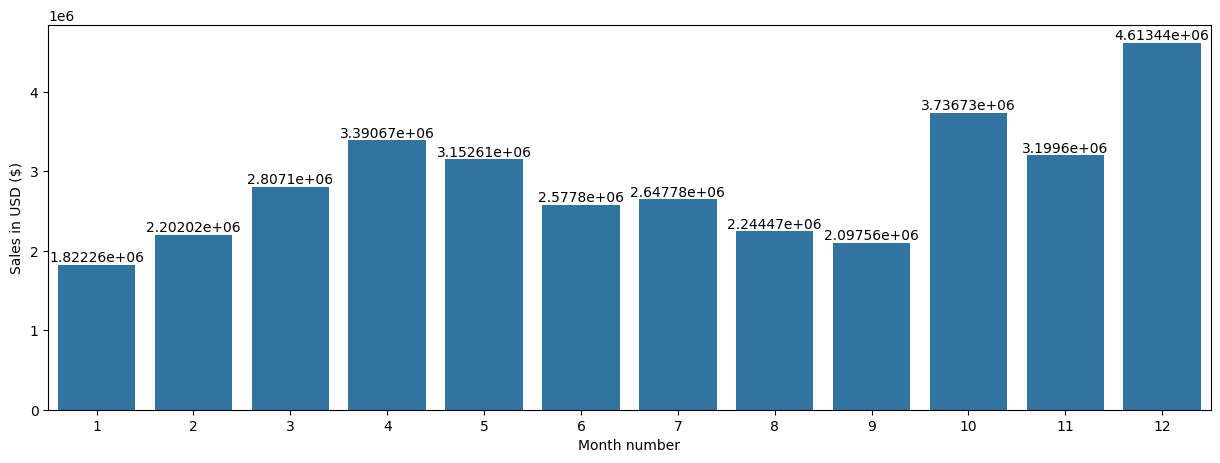

In [16]:
plt.figure(figsize=(15,5))
a=sns.barplot(x='Month',y='Sales',data=y)
for bars in a.containers:
    a.bar_label(bars)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')


range(1, 13)


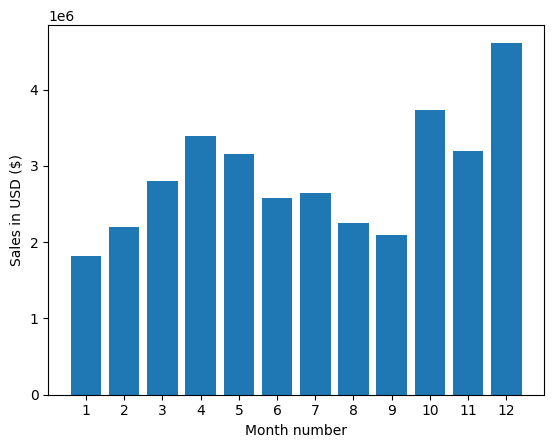

In [19]:
months = range(1,13)
print(months)

plt.bar(months,dataset.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Which city sold the most product?

In [20]:
dataset.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Pincode'],
      dtype='object')

In [21]:
x=dataset.groupby(['City']).sum(['Sales'])
print(x)

               Quantity Ordered   Price Each   Month       Sales
City                                                            
Atlanta                   16602  2779908.250  104794  2795498.50
Austin                    11153  1809873.625   69829  1819581.75
Boston                    22528  3637409.750  141112  3661642.00
Dallas                    16730  2752627.750  104620  2767975.50
Los Angeles               33289  5421435.000  208325  5452571.00
New York City             27932  4635371.000  175741  4664317.50
Portland                  14053  2307747.500   87765  2320490.50
San Francisco             50239  8211461.500  315520  8262204.00
Seattle                   16553  2733296.000  104941  2747755.50


Text(0.5, 1.0, 'Total Sales by City')

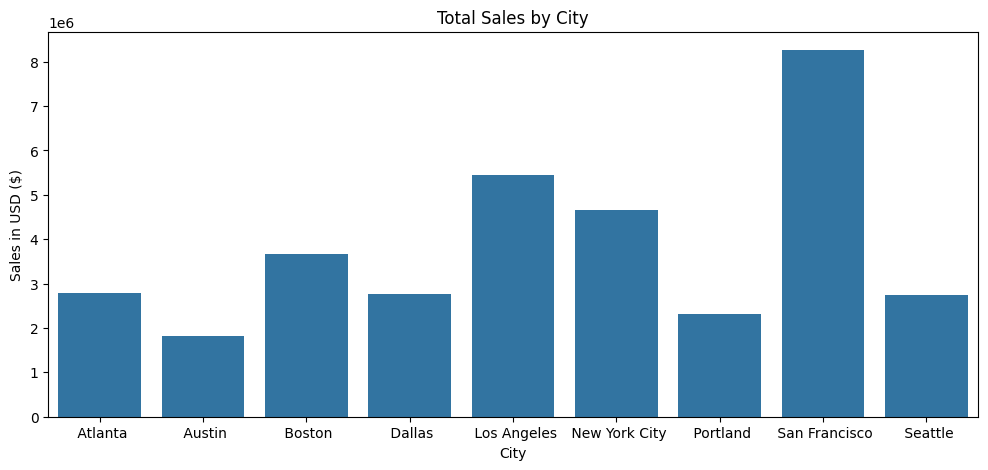

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='City',y='Sales',data=x)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
dataset['Order Date']=pd.to_datetime(dataset['Order Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\2738167681.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Order Date']=pd.to_datetime(dataset['Order Date'])


In [24]:
# Add hour column
dataset['Hour'] = pd.to_datetime(dataset['Order Date']).dt.hour
dataset['Minute'] = pd.to_datetime(dataset['Order Date']).dt.minute
dataset['Count'] = 1
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Pincode,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,TX 75001,8,46,1
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,MA 02215,22,30,1
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,CA 90001,14,38,1
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA 90001,14,38,1
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA 90001,9,27,1


In [25]:
hours= [hour for hour, df in dataset.groupby('Hour')]

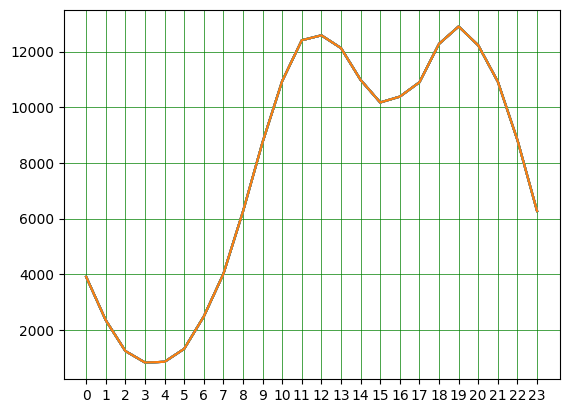

In [26]:
plt.plot(hours,dataset.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.5)

# My recommendation is slightly before 11am or 7pm

### What products are most often sold together?

In [27]:
data=dataset[dataset['Order ID'].duplicated(keep=False)]

data['Grouped']=data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

data=data[['Order ID','Grouped']].drop_duplicates()
data.head(20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7352\3939574608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped']=data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [30]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

In [31]:
dataset.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Pincode', 'Hour',
       'Minute', 'Count'],
      dtype='object')

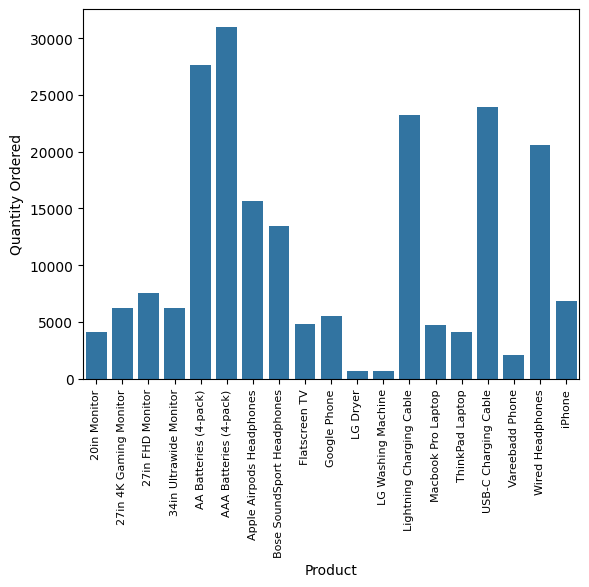

In [32]:
q=dataset.groupby(['Product']).sum(['Quantity Ordered'])

sns.barplot(x='Product',y='Quantity Ordered',data=q)
plt.xticks(rotation='vertical', size=8)
plt.show()